In [2]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

## 셀린느

In [4]:
mag_ce = pd.read_csv('./magazine/final/magazine_ce_stickword.csv', sep ='|', encoding = 'utf-8')

In [5]:
mag_ce

,magazine,brand,title,link,date,word_celine,ADFN,ADFN_2
0,A,Ce,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-11-10,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백..."
1,A,Ce,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-11-06,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE..."
2,A,Ce,남자 백’까지 갖고 싶어,http://www.allurekorea.com/2020/11/04/%eb%82%a...,2020-11-04,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","['대', 에스닉, '분위기', '물씬', 'CELINE', '방패', '모양', ..."
3,A,Ce,예림-예리,http://www.allurekorea.com/2020/11/03/%ec%98%8...,2020-11-03,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '..."
4,A,Ce,"GOOD TIME, 헨리",http://www.allurekorea.com/2020/10/26/good-tim...,2020-10-26,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ..."
...,...,...,...,...,...,...,...,...
759,W,Ce,G의 역습,http://www.wkorea.com/2016/11/15/g%ec%9d%98-%e...,2016-11-15,마야 셀리아 샐리(MAYA CELIA SALLY)N2017 S/S CELINE의 쇼...,"['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', 'S...","['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', SS..."
760,W,Ce,잊지 마 2,http://www.wkorea.com/2016/09/28/%ec%9e%8a%ec%...,2016-09-28,"코리아 파워, 록(ROKH)N지난해 S/S에 파리에서 데뷔한 32세 한국 디자이너 ...","['코리아', '파워', '록', 'Rokh', '지난해', 'S', 'S', '파...","['코리아', '파워', '록', 'Rokh', '지난해', SS, '파리', '데..."
761,W,Ce,사고 말겠어!,http://www.wkorea.com/2016/09/21/%ec%82%ac%ea%...,2016-09-21,패션 에디터 김신N가을이 다가오니 괜스레 감상적이 된다. 정제된 보헤미안 감성과 함...,"['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '...","['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '..."
762,W,Ce,남다르게,http://www.wkorea.com/2016/09/08/%eb%82%a8%eb%...,2016-09-08,"허리에 가방N주머니인 듯 아닌 듯, 벨트인 듯 아닌 듯 허리 가방’에 새로운 생명을...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',..."


In [6]:
mag_ce['word'] = mag_ce['word_celine']

In [7]:
mag_CE = mag_ce[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [8]:
len(mag_CE)

764

### 4

In [9]:
idx4 = []
for i in range(len(mag_CE)):
    if i % 4 == 0 :
        idx4.append(i)

In [10]:
mag_CE4 = mag_CE.loc[idx4]

In [11]:
mag_CE4.reset_index(drop = True, inplace = True)

In [12]:
len(mag_CE4)

191

## 리사

### 리사 (유튜브 + 매거진)

In [13]:
tot_li = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [14]:
tot_li['word'] = tot_li['word_lisa']

In [15]:
tot_L = tot_li[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [16]:
len(tot_L)

197

### 셀린느 + 리사

In [17]:
CE4L = pd.concat([mag_CE4, tot_L])

In [18]:
CE4L.reset_index(drop = True, inplace = True)

In [19]:
CE4L.to_csv('./magazine/final/CE4L.csv', sep = '|', encoding = 'utf-8', index = False)

In [20]:
len(CE4L)

388

## stopword 추가

In [21]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [22]:
sw_df.columns = ['stopword']

In [23]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [24]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [25]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [26]:
add_0 = ['해', '하는', '할', '한', '영상', '했다', '뭐', '넘', '수', '정말', '그냥', '보고', '있는',
         '전소민', '공유', '양세찬', '항상', '다시', '통해', '한편', 'a', '공개', '자체', '형', '와중', '↑', '걸',
         '있습니다', 'to', '아닌데', '있는데', '보기', '하다', '곤', '없어', '대한', '싶다', '명', '민','the',
         '보니', '아는', '전', '진짜', '멤버', '잘', '모습', '발음', '제일', '기자', '데뷔', '아는', '택시', 
         '활동', '썸네일', '나도', '가사', '하네요', '길다', '보이는', '까', '없는데', '몰랐는데', '대해', 
         '보인다', '위해', '로서', '이수근', '보여', '있으면', '보다', '같네', '하자', '최수영', 'that', 
         '하며', '세찬', '않고', '됨', '오는', '사이', '아주', '진행', '채', '이자',
        '진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히']
for w in add_0:
    stop_words.append(w)

In [27]:
add_1 = ['BLACKPINK', '제니', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [28]:
len(stop_words)

899

In [29]:
CE4L['ADFN_2'] = CE4L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [32]:
noun_adj_list = []
for i in range(len(CE4L)):
    for word in CE4L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [33]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3576), ('예쁘다', 676), ('귀엽다', 543), ('CELINE', 526), ('춤', 478), ('사랑', 331), ('패션', 283), ('랩', 276), ('한국', 258), ('영어', 248), ('브랜드', 230), ('노래', 224), ('컬렉션', 219), ('매력', 206), ('무대', 204), ('얼굴', 202), ('컬러', 180), ('아이돌', 178), ('SLIMANE', 173), ('HEDI', 172), ('태국', 170), ('룩', 162), ('중국', 160), ('한국어', 156), ('한국인', 146), ('가장', 143), ('느낌', 142), ('스타일', 140), ('비율', 133), ('표정', 133), ('블랙', 130), ('디자이너', 129), ('멋있다', 129), ('실력', 125), ('팬', 120), ('외국인', 118), ('여자', 117), ('눈', 115), ('시즌', 108), ('옷', 105), ('모델', 102), ('지난', 101), ('여성', 100), ('재킷', 99), ('팬츠', 98), ('최고', 98), ('머리', 95), ('드레스', 94), ('백', 92), ('남성', 91), ('영국', 91), ('연습생', 88), ('쇼', 87), ('봄', 86), ('호랑이', 86), ('아이템', 85), ('인기', 84), ('새로운', 82), ('매치', 82), ('좋은', 79), ('세계', 79), ('그룹', 79), ('예능', 79), ('디렉터', 77), ('파리', 76), ('프로', 75), ('분위기', 74), ('프라다', 73), ('다리', 73), ('처음', 73), ('대', 72), ('포인트', 71), ('PHOEBE', 71), ('PHILO', 71), ('스타', 71), ('스커트', 70), ('디자인', 70), 

In [34]:
count = Counter(noun_adj_list)

In [35]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('리사', 3576)
('예쁘다', 676)
('귀엽다', 543)
('CELINE', 526)
('춤', 478)
('사랑', 331)
('패션', 283)
('랩', 276)
('한국', 258)
('영어', 248)
('브랜드', 230)
('노래', 224)
('컬렉션', 219)
('매력', 206)
('무대', 204)
('얼굴', 202)
('컬러', 180)
('아이돌', 178)
('SLIMANE', 173)
('HEDI', 172)
('태국', 170)
('룩', 162)
('중국', 160)
('한국어', 156)
('한국인', 146)
('가장', 143)
('느낌', 142)
('스타일', 140)
('비율', 133)
('표정', 133)
('블랙', 130)
('디자이너', 129)
('멋있다', 129)
('실력', 125)
('팬', 120)
('외국인', 118)
('여자', 117)
('눈', 115)
('시즌', 108)
('옷', 105)
('모델', 102)
('지난', 101)
('여성', 100)
('재킷', 99)
('팬츠', 98)
('최고', 98)
('머리', 95)
('드레스', 94)
('백', 92)
('남성', 91)
('영국', 91)
('연습생', 88)
('쇼', 87)
('봄', 86)
('호랑이', 86)
('아이템', 85)
('인기', 84)
('새로운', 82)
('매치', 82)
('좋은', 79)
('세계', 79)
('그룹', 79)
('예능', 79)
('디렉터', 77)
('파리', 76)
('프로', 75)
('분위기', 74)
('프라다', 73)
('다리', 73)
('처음', 73)
('대', 72)
('포인트', 71)
('PHOEBE', 71)
('PHILO', 71)
('스타', 71)
('스커트', 70)
('디자인', 70)
('앞머리', 70)
('첫', 70)
('장식', 67)
('LAURENT', 67)
('완성', 67)
('외국', 67)
('단발', 

In [36]:
top500 = pd.DataFrame(word_list)

In [37]:
top500.columns = ['word', 'count']

In [38]:
top500.to_csv('./CE4L_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [39]:
import matplotlib.pyplot as plt

In [40]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [41]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [42]:
from wordcloud import WordCloud

In [43]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

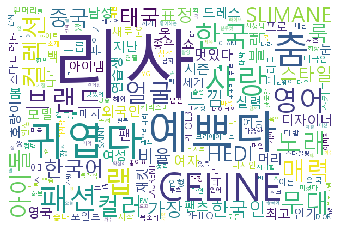

In [44]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CE4L.png')

In [45]:
CE4L.to_csv('./magazine/final/CE4L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)